In [223]:
%pip install pandas numpy matplotlib scipy scikit-learn seaborn plotly category-encoders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [224]:
#imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from category_encoders import BinaryEncoder
from sklearn.model_selection import GridSearchCV

path = r"C:\Users\patel\OneDrive\Desktop\projects\SIF Application\SIF\data"
import os

import warnings 
warnings.filterwarnings('ignore')

features = pd.read_csv(path + r"\features.csv")
test = pd.read_csv(path + r"\test.csv")
train = pd.read_csv(path + r"\train.csv")

In [225]:
#preprocessing training data
preprocessed_train = train.copy()

preprocessed_train['Date'] = pd.to_datetime(preprocessed_train['Date'])
preprocessed_train['Year'] = preprocessed_train['Date'].dt.year
preprocessed_train['Month'] = preprocessed_train['Date'].dt.month
preprocessed_train['Week'] = preprocessed_train['Date'].dt.isocalendar().week

preprocessed_train['IsHoliday'] = preprocessed_train['IsHoliday'].astype(int)

output_path = r"C:\Users\patel\OneDrive\Desktop\projects\SIF Application\SIF\data\preprocessed_train.csv"
preprocessed_train.to_csv(output_path, index=False)

preprocessed_train.info()
preprocessed_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Year          421570 non-null  int32         
 6   Month         421570 non-null  int32         
 7   Week          421570 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(2), int64(3)
memory usage: 21.3 MB


Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375104   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales      IsHoliday           Year          Month       Week  
count  421570.000000  421570.000000  421570.000000  421570.000000   421570.0  
mean    15981.258123       0.070358    2010.968591       6.449510  25.826762  
min     -4988.940000       0.000000    2010.000000       1.000000        1.0  
25%      2079.650000       0.000000    2010.000000       4.000000       14.0  
50%      7612.030000       0.000000    2011.000000       6.000000       26.0  
75%     20205.852500       0.000000    2012.000000       9.000000       38.0  
max    693099.360000       1.000000    2012.000000      12.000000       52.0  
std     22711.183519       0.255750       0.796876       3.243217  14.151887

In [226]:
#preprocessing testing data
preprocessed_test = test.copy()

preprocessed_test['Date'] = pd.to_datetime(preprocessed_test['Date'])
preprocessed_test['Year'] = preprocessed_test['Date'].dt.year
preprocessed_test['Month'] = preprocessed_test['Date'].dt.month
preprocessed_test['Week'] = preprocessed_test['Date'].dt.isocalendar().week

preprocessed_test['IsHoliday'] = preprocessed_test['IsHoliday'].astype(int)

output_path = r"C:\Users\patel\OneDrive\Desktop\projects\SIF Application\SIF\data\preprocessed_test.csv"
preprocessed_test.to_csv(output_path, index=False)

preprocessed_test.info()
preprocessed_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Store      115064 non-null  int64         
 1   Dept       115064 non-null  int64         
 2   Date       115064 non-null  datetime64[ns]
 3   IsHoliday  115064 non-null  int64         
 4   Year       115064 non-null  int32         
 5   Month      115064 non-null  int32         
 6   Week       115064 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), int32(2), int64(3)
memory usage: 4.9 MB


Store           Dept                           Date  \
count  115064.000000  115064.000000                         115064   
mean       22.238207      44.339524  2013-03-14 14:39:41.311270144   
min         1.000000       1.000000            2012-11-02 00:00:00   
25%        11.000000      18.000000            2013-01-04 00:00:00   
50%        22.000000      37.000000            2013-03-15 00:00:00   
75%        33.000000      74.000000            2013-05-24 00:00:00   
max        45.000000      99.000000            2013-07-26 00:00:00   
std        12.809930      30.656410                            NaN   

           IsHoliday           Year          Month       Week  
count  115064.000000  115064.000000  115064.000000   115064.0  
mean        0.077592    2012.767182       5.729855  23.050963  
min         0.000000    2012.000000       1.000000        1.0  
25%         0.000000    2013.000000       3.000000       10.0  
50%         0.000000    2013.000000       5.000000       20.0  
75%         0.000000    2013.000000       7.000000       30.0  
max         1.000000    2013.000000      12.000000       52.0  
std         0.267529       0.422629       3.590331  15.750407

In [227]:
#preprocessing features data
preprocessed_features = features.copy()

preprocessed_features['Date'] = pd.to_datetime(preprocessed_features['Date'])
preprocessed_features['Year'] = preprocessed_features['Date'].dt.year
preprocessed_features['Month'] = preprocessed_features['Date'].dt.month
preprocessed_features['Week'] = preprocessed_features['Date'].dt.isocalendar().week

preprocessed_features['IsHoliday'] = preprocessed_features['IsHoliday'].astype(int)

markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
economic_columns = ['CPI', 'Unemployment']

preprocessed_features[markdown_columns] = preprocessed_features[markdown_columns].fillna(preprocessed_features[markdown_columns].median())
preprocessed_features[economic_columns] = preprocessed_features[economic_columns].fillna(preprocessed_features[economic_columns].median())

preprocessed_features.dropna(inplace=True)

output_path = r"C:\Users\patel\OneDrive\Desktop\projects\SIF Application\SIF\data\preprocessed_features.csv"
preprocessed_features.to_csv(output_path, index=False)

preprocessed_features.info()
preprocessed_features.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   int64         
 12  Year          8190 non-null   int32         
 13  Month         8190 non-null   int32         
 14  Week          8190 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float

Store                 Date  Temperature   Fuel_Price  \
count  8190.000000                 8190  8190.000000  8190.000000   
mean     23.000000  2011-10-31 12:00:00    59.356198     3.405992   
min       1.000000  2010-02-05 00:00:00    -7.290000     2.472000   
25%      12.000000  2010-12-17 00:00:00    45.902500     3.041000   
50%      23.000000  2011-10-31 12:00:00    60.710000     3.513000   
75%      34.000000  2012-09-14 00:00:00    73.880000     3.743000   
max      45.000000  2013-07-26 00:00:00   101.950000     4.468000   
std      12.987966                  NaN    18.678607     0.431337   

           MarkDown1      MarkDown2      MarkDown3     MarkDown4  \
count    8190.000000    8190.000000    8190.000000   8190.000000   
mean     5870.369802    1441.526149     796.728201   2071.613487   
min     -2781.450000    -265.760000    -179.260000      0.220000   
25%      4743.580000     364.570000      36.260000   1176.425000   
50%      4743.580000     364.570000      36.260000   1176.425000   
75%      4743.580000     364.570000      36.260000   1176.425000   
max    103184.980000  104519.540000  149483.310000  67474.850000   
std      6598.744531    5446.593934    7537.887934   4539.111378   

           MarkDown5          CPI  Unemployment    IsHoliday         Year  \
count    8190.000000  8190.000000   8190.000000  8190.000000  8190.000000   
mean     3421.955484   173.196752      7.825334     0.071429  2011.351648   
min      -185.170000   126.064000      3.684000     0.000000  2010.000000   
25%      2727.135000   132.653774      6.833000     0.000000  2010.000000   
50%      2727.135000   182.764003      7.806000     0.000000  2011.000000   
75%      2727.135000   212.766994      8.519000     0.000000  2012.000000   
max    771448.100000   228.976456     14.313000     1.000000  2013.000000   
std      9228.907117    38.384486      1.808971     0.257555     1.041762   

             Month       Week  
count  8190.000000     8190.0  
mean      6.291209  25.214286  
min       1.000000        1.0  
25%       3.000000       13.0  
50%       6.000000       24.0  
75%       9.000000       37.0  
max      12.000000       52.0  
std       3.328046  14.527604

In [228]:
monthly_revenue = preprocessed_train.groupby('Month')[['Weekly_Sales']].sum()
print(monthly_revenue)

best_month = monthly_revenue.sort_values('Weekly_Sales', ascending=False).index[0] 
print('Best Month:', best_month)

       Weekly_Sales
Month              
1      3.325984e+08
2      5.687279e+08
3      5.927859e+08
4      6.468598e+08
5      5.571256e+08
6      6.226299e+08
7      6.500010e+08
8      6.130902e+08
9      5.787612e+08
10     5.847848e+08
11     4.130157e+08
12     5.768386e+08
Best Month: 7


In [229]:
print(preprocessed_train.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Year', 'Month',
       'Week'],
      dtype='object')


In [230]:
preprocessed_combined_train_features = pd.merge(preprocessed_features, preprocessed_train, on=['Store','Date', 'IsHoliday', 'Year', 'Month', 'Week'])

print(preprocessed_combined_train_features.head())

output_path = r"C:\Users\patel\OneDrive\Desktop\projects\SIF Application\SIF\data\preprocessed_combined_train_features.csv"
preprocessed_combined_train_features.to_csv(output_path, index=False)

preprocessed_combined_train_features.info()

   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572    4743.58     364.57      36.26   
1      1 2010-02-05        42.31       2.572    4743.58     364.57      36.26   
2      1 2010-02-05        42.31       2.572    4743.58     364.57      36.26   
3      1 2010-02-05        42.31       2.572    4743.58     364.57      36.26   
4      1 2010-02-05        42.31       2.572    4743.58     364.57      36.26   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  Year  Month  \
0   1176.425   2727.135  211.096358         8.106          0  2010      2   
1   1176.425   2727.135  211.096358         8.106          0  2010      2   
2   1176.425   2727.135  211.096358         8.106          0  2010      2   
3   1176.425   2727.135  211.096358         8.106          0  2010      2   
4   1176.425   2727.135  211.096358         8.106          0  2010      2   

   Week  Dept  Weekly_Sales  
0     5     1      2

In [231]:
preprocessed_store_sales_train_features = preprocessed_combined_train_features.groupby(['Store', 'Date']).agg({'Weekly_Sales': 'sum', 
                                                                                      'Temperature': 'first', 
                                                                                      'Fuel_Price': 'first', 
                                                                                      'MarkDown1': 'first',
                                                                                      'MarkDown2': 'first',
                                                                                      'MarkDown3': 'first',
                                                                                      'MarkDown4': 'first',
                                                                                      'MarkDown5': 'first',
                                                                                      'CPI': 'first',
                                                                                      'Unemployment': 'first',
                                                                                      'IsHoliday': 'first',
                                                                                      'Year': 'first',
                                                                                      'Month': 'first',
                                                                                      'Week': 'first',
                                                                                      }).reset_index() 

print(preprocessed_store_sales_train_features.head())

output_path = r"C:\Users\patel\OneDrive\Desktop\projects\SIF Application\SIF\data\preprocessed_store_sales.csv"
preprocessed_store_sales_train_features.to_csv(output_path, index=False)

   Store       Date  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
0      1 2010-02-05    1643690.90        42.31       2.572    4743.58   
1      1 2010-02-12    1641957.44        38.51       2.548    4743.58   
2      1 2010-02-19    1611968.17        39.93       2.514    4743.58   
3      1 2010-02-26    1409727.59        46.63       2.561    4743.58   
4      1 2010-03-05    1554806.68        46.50       2.625    4743.58   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0     364.57      36.26   1176.425   2727.135  211.096358         8.106   
1     364.57      36.26   1176.425   2727.135  211.242170         8.106   
2     364.57      36.26   1176.425   2727.135  211.289143         8.106   
3     364.57      36.26   1176.425   2727.135  211.319643         8.106   
4     364.57      36.26   1176.425   2727.135  211.350143         8.106   

   IsHoliday  Year  Month  Week  
0          0  2010      2     5  
1          1  2010      2     6  
2       

In [232]:
preprocessed_combined_test_features = pd.merge(preprocessed_features, preprocessed_test, on=['Store','Date', 'IsHoliday', 'Year', 'Month', 'Week'])

print(preprocessed_combined_test_features.head())

output_path = r"C:\Users\patel\OneDrive\Desktop\projects\SIF Application\SIF\data\preprocessed_combined_test_features.csv"
preprocessed_combined_test_features.to_csv(output_path, index=False)

preprocessed_combined_test_features.info()

   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2012-11-02        55.32       3.386    6766.44     5147.7      50.82   
1      1 2012-11-02        55.32       3.386    6766.44     5147.7      50.82   
2      1 2012-11-02        55.32       3.386    6766.44     5147.7      50.82   
3      1 2012-11-02        55.32       3.386    6766.44     5147.7      50.82   
4      1 2012-11-02        55.32       3.386    6766.44     5147.7      50.82   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  Year  Month  \
0     3639.9    2737.42  223.462779         6.573          0  2012     11   
1     3639.9    2737.42  223.462779         6.573          0  2012     11   
2     3639.9    2737.42  223.462779         6.573          0  2012     11   
3     3639.9    2737.42  223.462779         6.573          0  2012     11   
4     3639.9    2737.42  223.462779         6.573          0  2012     11   

   Week  Dept  
0    44     1  
1    44     2  
2 

In [233]:
preprocessed_store_sales_test_features = preprocessed_combined_test_features.groupby(['Store', 'Date']).agg({ 
                                                                                      'Temperature': 'first', 
                                                                                      'Fuel_Price': 'first', 
                                                                                      'MarkDown1': 'first',
                                                                                      'MarkDown2': 'first',
                                                                                      'MarkDown3': 'first',
                                                                                      'MarkDown4': 'first',
                                                                                      'MarkDown5': 'first',
                                                                                      'CPI': 'first',
                                                                                      'Unemployment': 'first',
                                                                                      'IsHoliday': 'first',
                                                                                      'Year': 'first',
                                                                                      'Month': 'first',
                                                                                      'Week': 'first',
                                                                                      }).reset_index() 

print(preprocessed_store_sales_test_features.head())

output_path = r"C:\Users\patel\OneDrive\Desktop\projects\SIF Application\SIF\data\preprocessed_store_sales_test_features.csv"
preprocessed_store_sales_test_features.to_csv(output_path, index=False)

   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2012-11-02        55.32       3.386    6766.44    5147.70      50.82   
1      1 2012-11-09        61.24       3.314   11421.32    3370.89      40.28   
2      1 2012-11-16        52.92       3.252    9696.28     292.10     103.78   
3      1 2012-11-23        56.23       3.211     883.59       4.17   74910.32   
4      1 2012-11-30        52.34       3.207    2460.03     364.57    3838.35   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  Year  Month  \
0    3639.90    2737.42  223.462779         6.573          0  2012     11   
1    4646.79    6154.16  223.481307         6.573          0  2012     11   
2    1133.15    6612.69  223.512911         6.573          0  2012     11   
3     209.91     303.32  223.561947         6.573          1  2012     11   
4     150.57    6966.34  223.610984         6.573          0  2012     11   

   Week  
0    44  
1    45  
2    46  
3    47  


<Axes: >

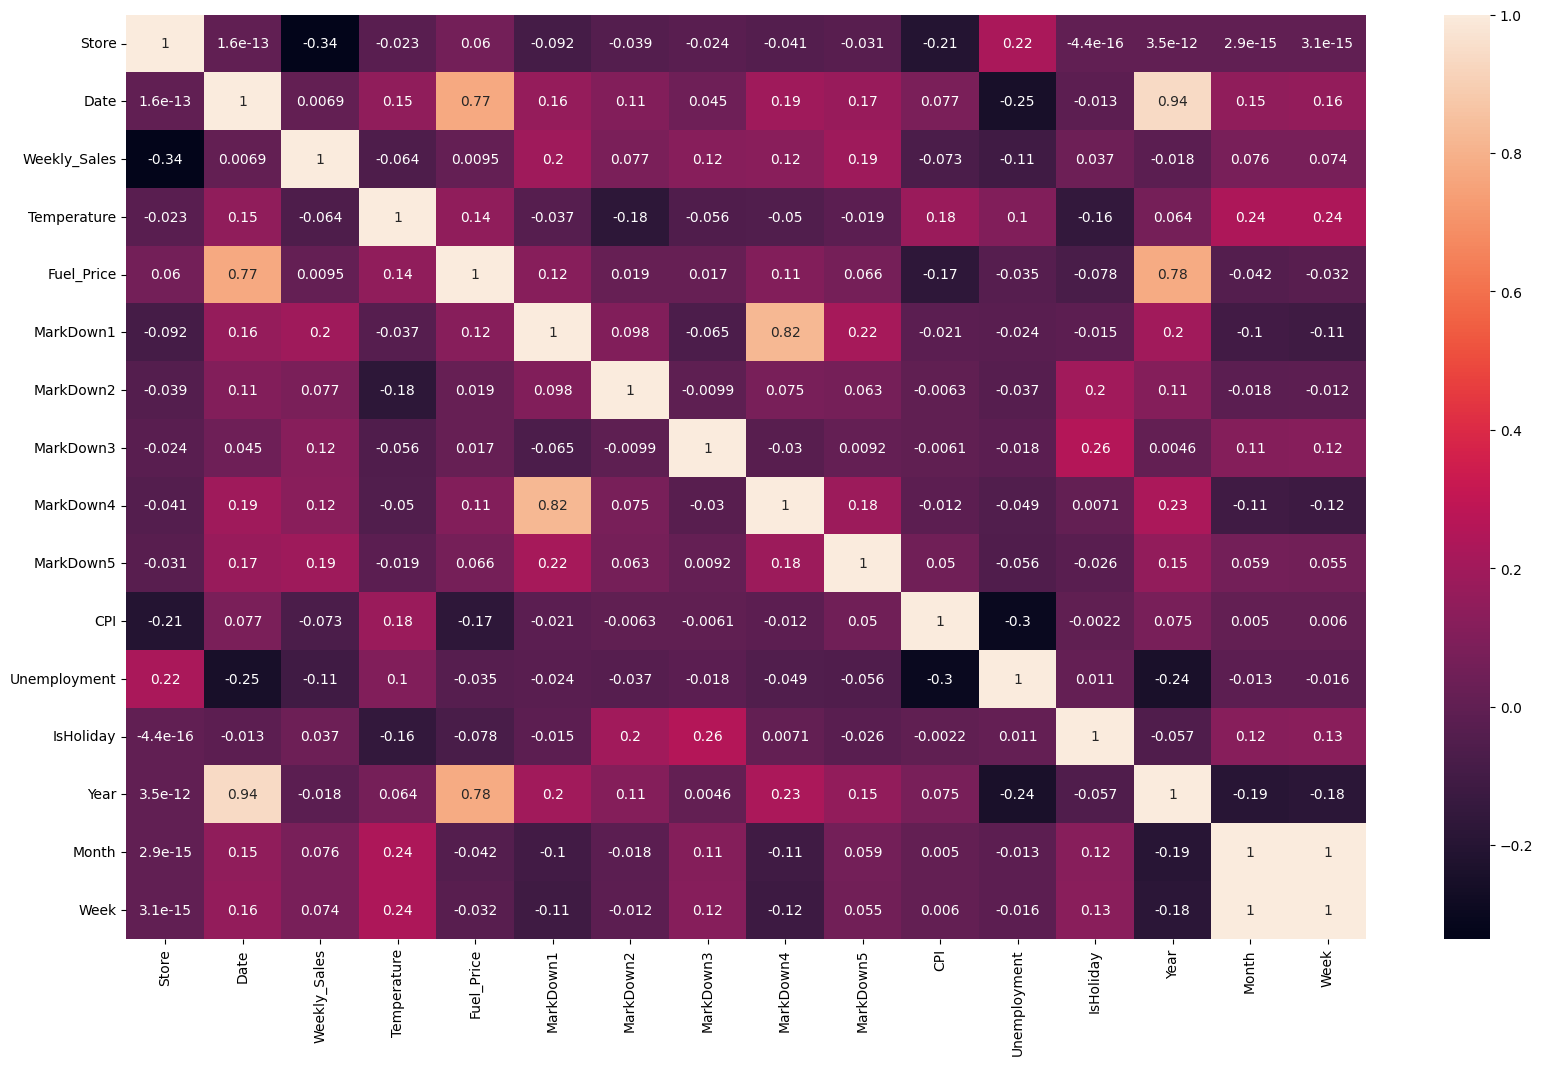

In [323]:
plt.figure(figsize=(20,12))
sns.heatmap(preprocessed_store_sales_train_features.corr(),annot=True)

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

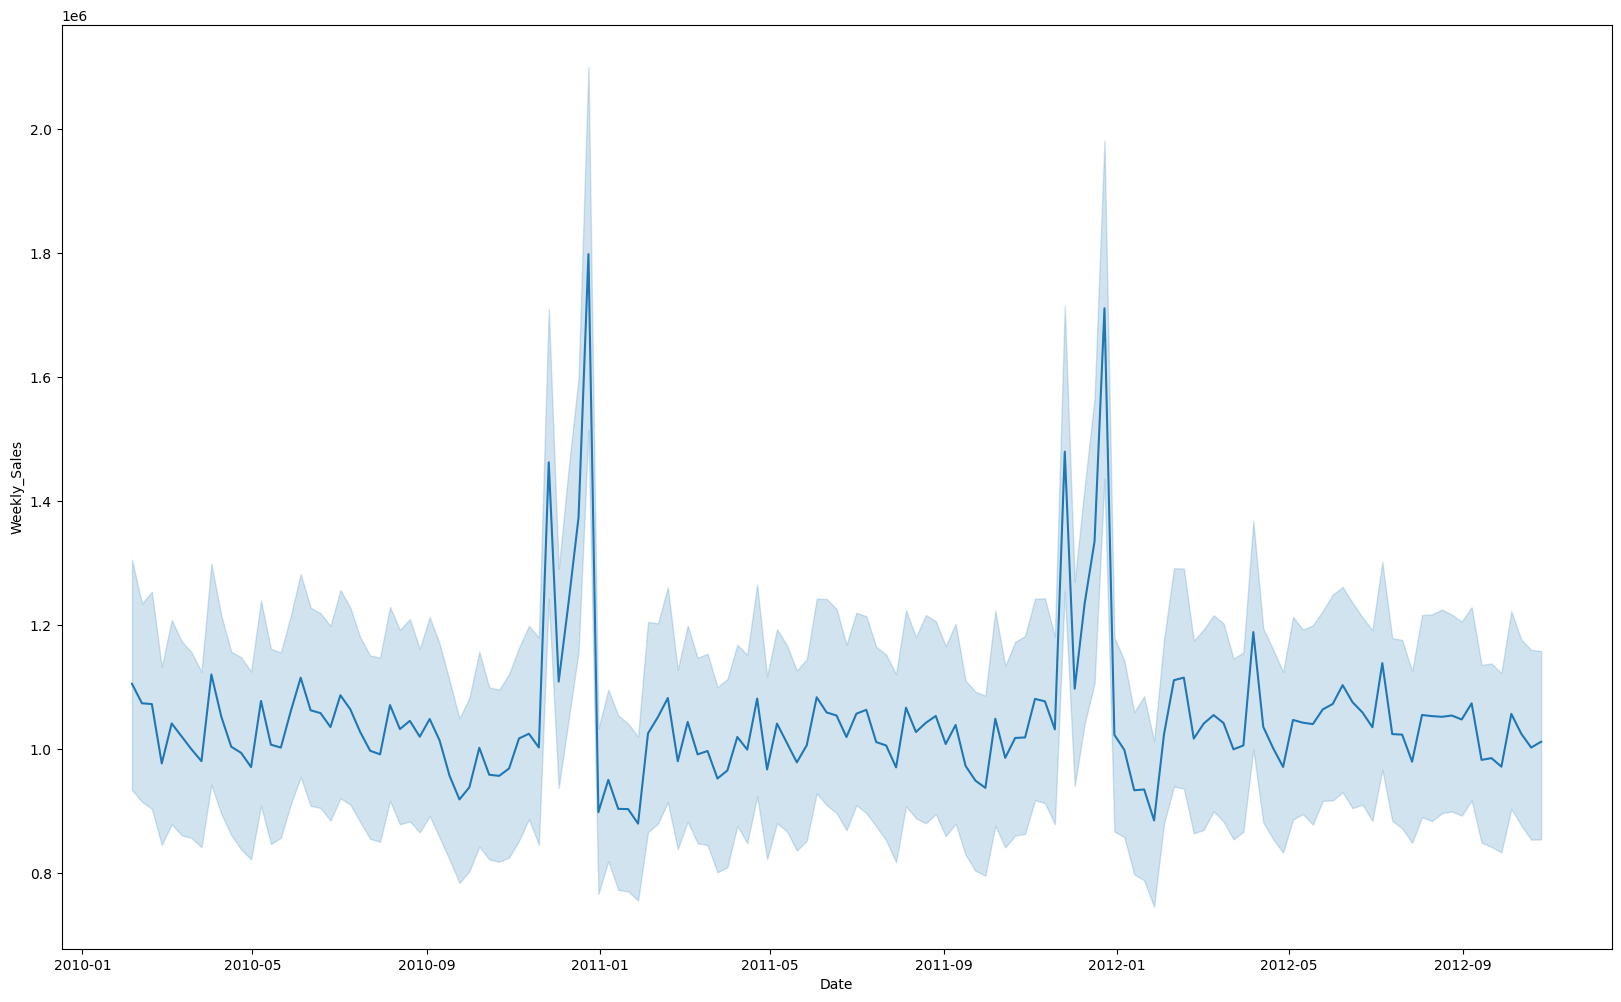

In [235]:
plt.figure(figsize=(20,12))
sns.lineplot(x='Date', y='Weekly_Sales', data=preprocessed_store_sales_train_features)

<Axes: xlabel='Date', ylabel='Fuel_Price'>

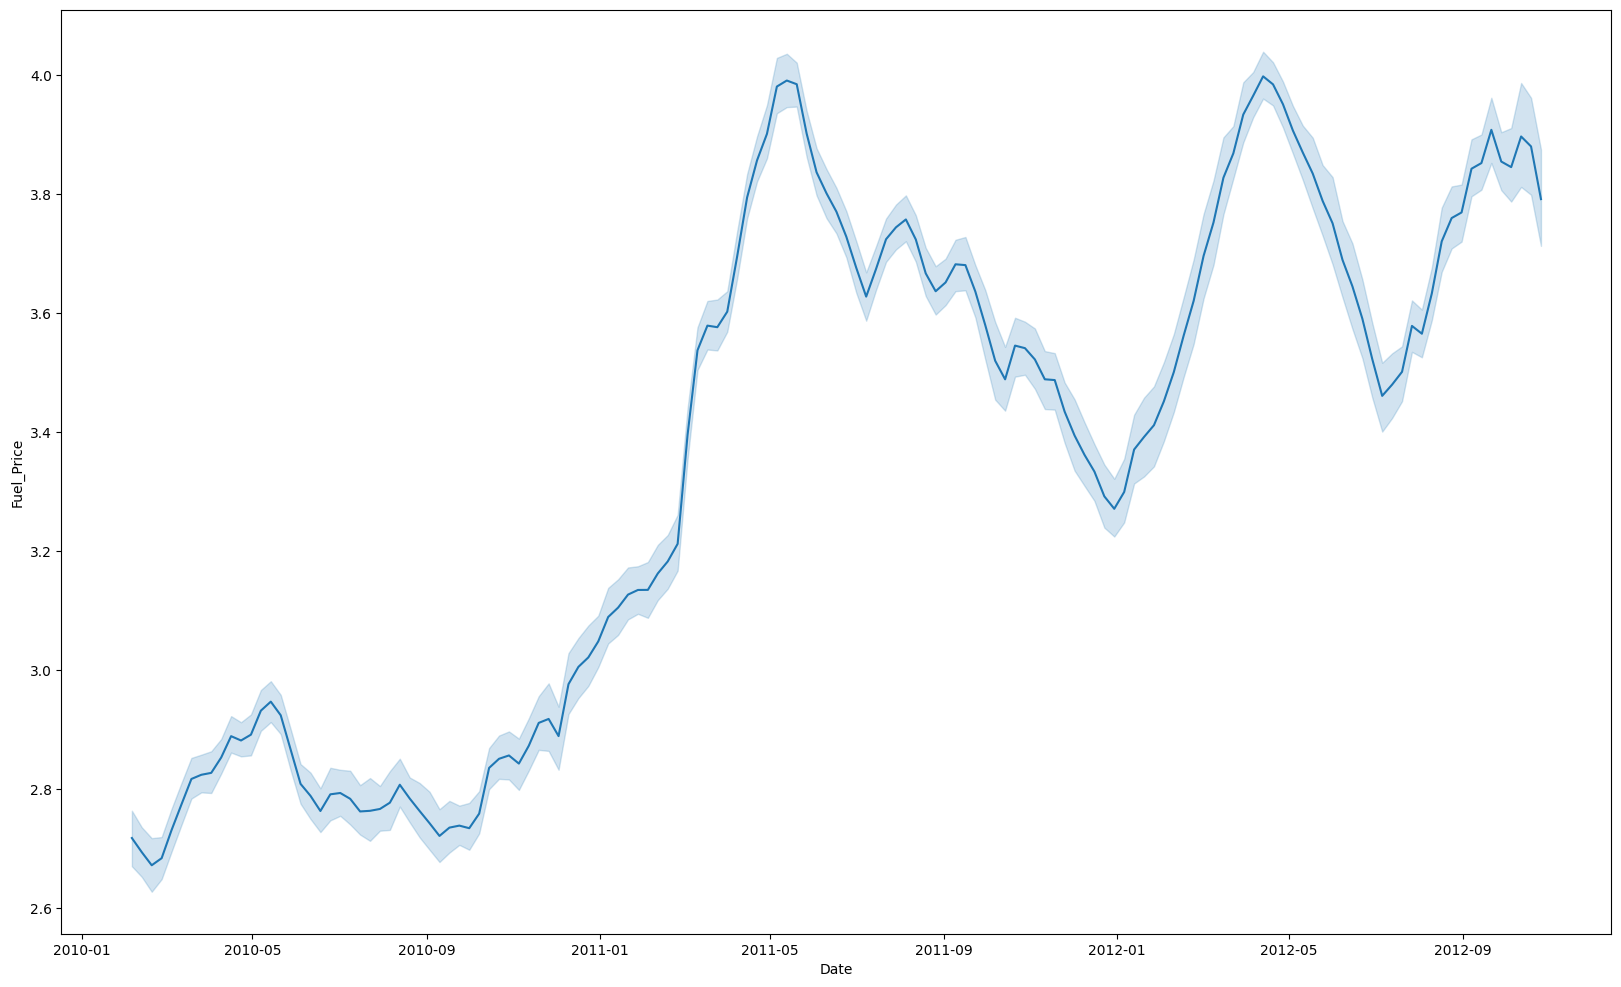

In [330]:
plt.figure(figsize=(20,12))
sns.lineplot(x='Date', y='Fuel_Price', data=preprocessed_store_sales_train_features)

<Axes: xlabel='Date', ylabel='CPI'>

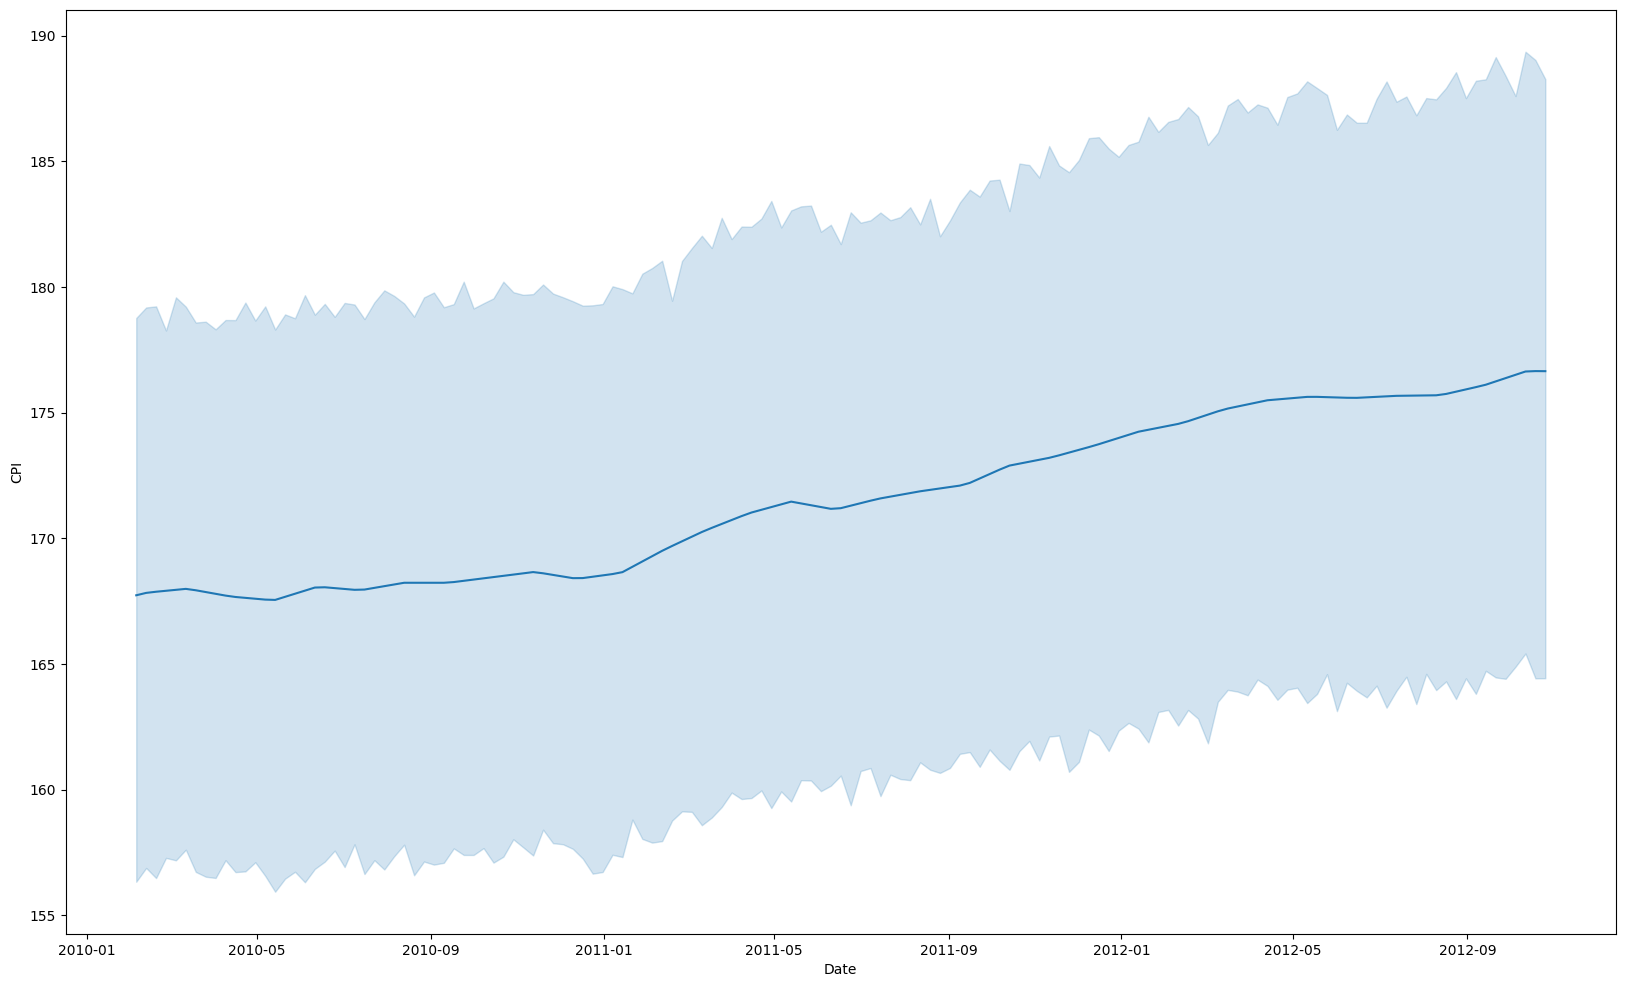

In [331]:
plt.figure(figsize=(20,12))
sns.lineplot(x='Date', y='CPI', data=preprocessed_store_sales_train_features)

<Axes: xlabel='Date', ylabel='Temperature'>

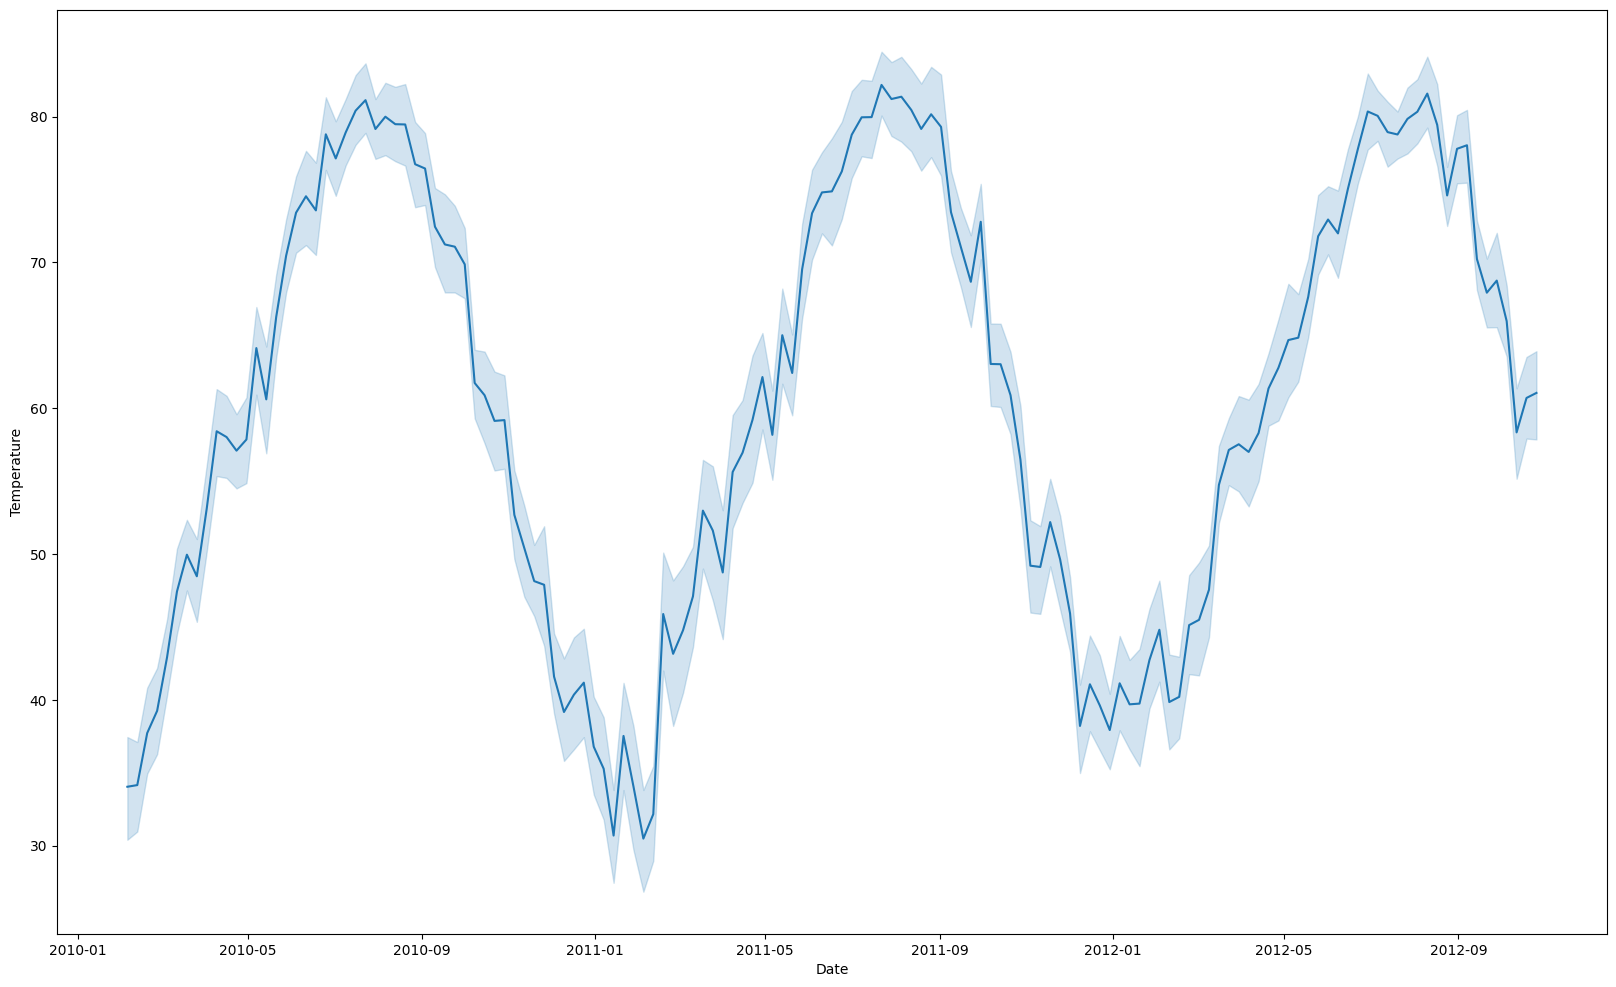

In [332]:
plt.figure(figsize=(20,12))
sns.lineplot(x='Date', y='Temperature', data=preprocessed_store_sales_train_features)

<Axes: xlabel='Date', ylabel='Unemployment'>

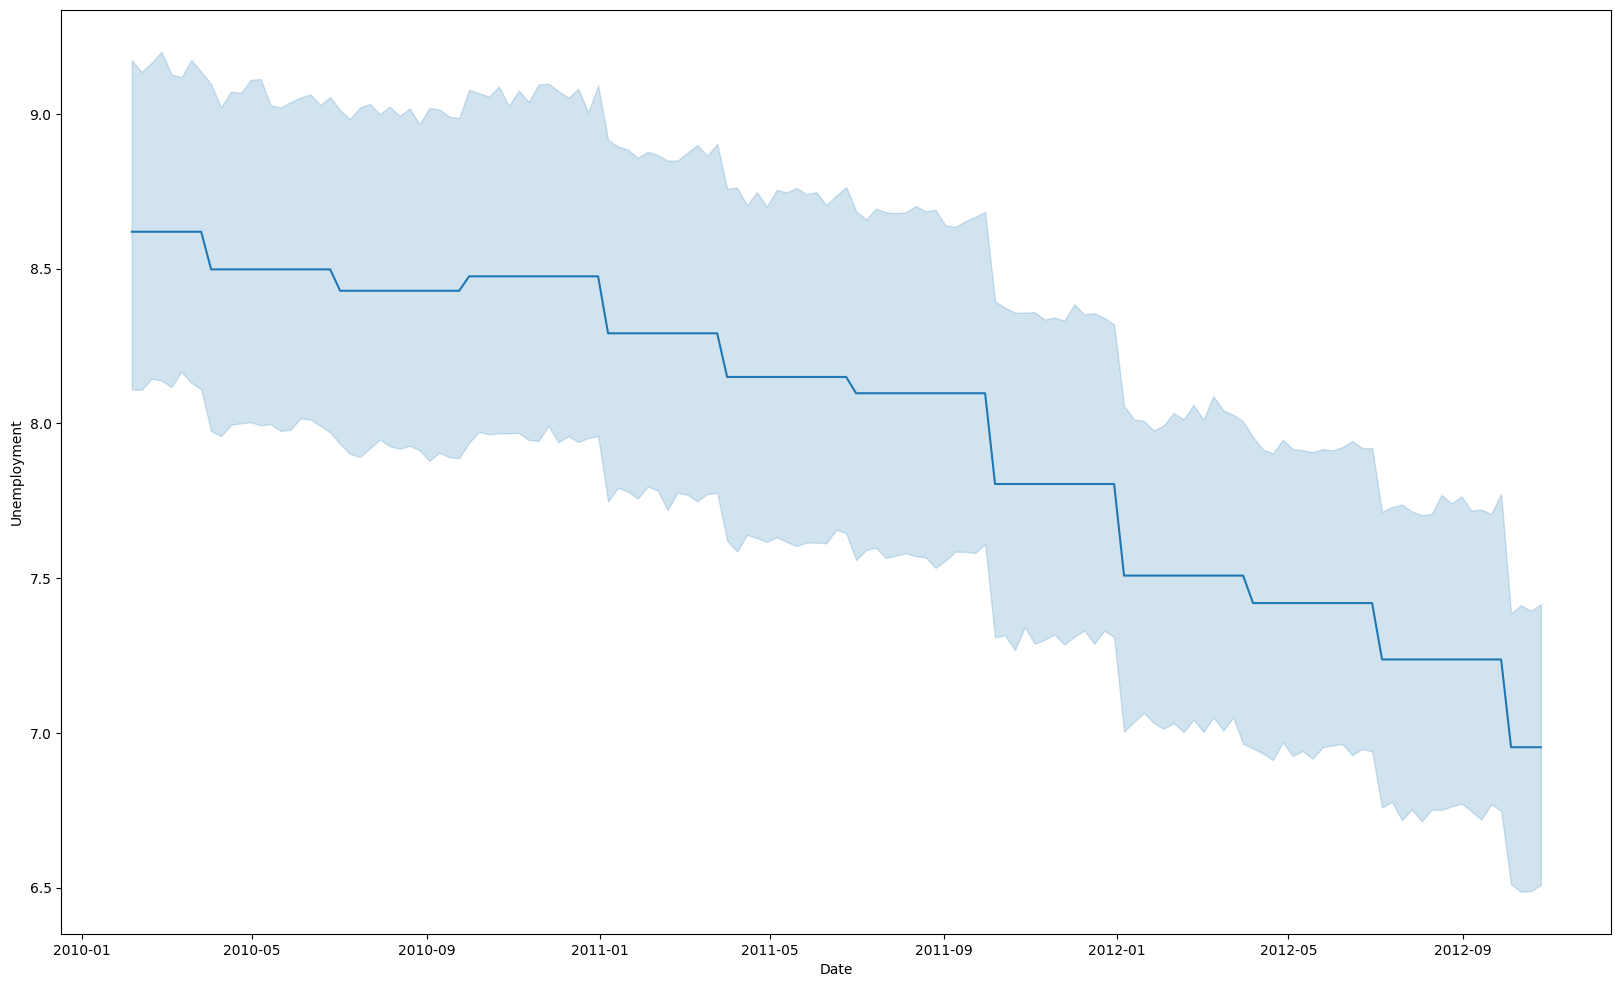

In [334]:
plt.figure(figsize=(20,12))
sns.lineplot(x='Date', y='Unemployment', data=preprocessed_store_sales_train_features)

<Figure size 1000x600 with 0 Axes>

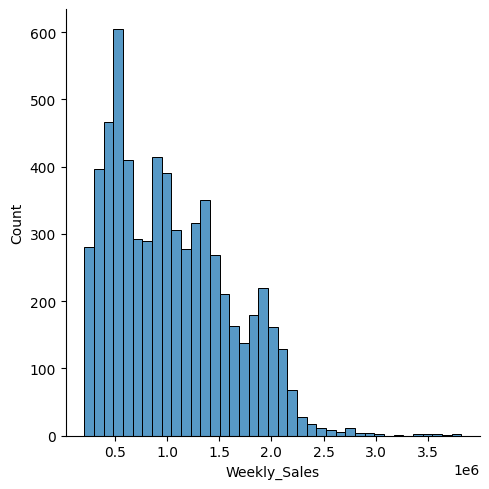

<Figure size 1000x600 with 0 Axes>

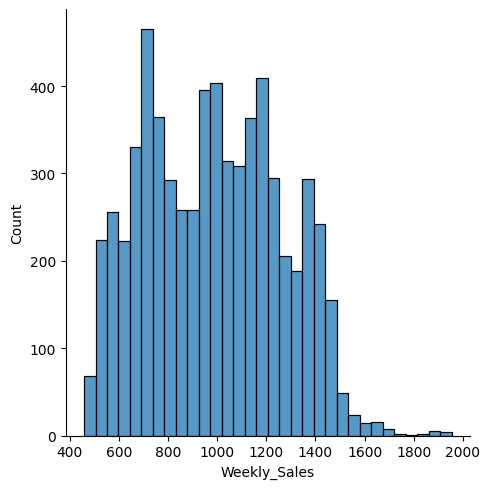

In [237]:
plt.figure(figsize=(10,6))
sns.displot(np.sqrt(preprocessed_store_sales_train_features['Weekly_Sales']))

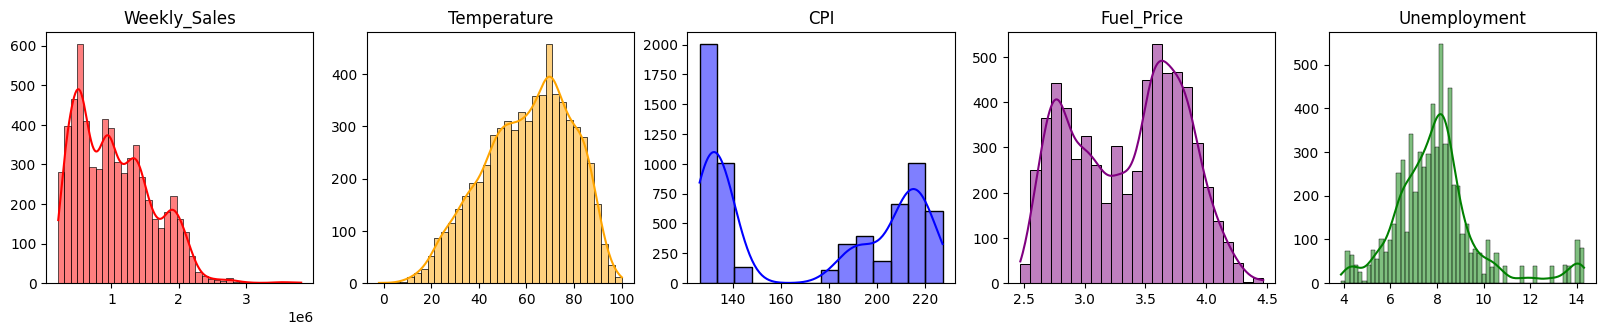

In [324]:
columns=['Weekly_Sales','Temperature','CPI','Fuel_Price','Unemployment']

plt.figure(figsize=(20,15))
colors = ['red', 'orange', 'blue', 'purple','green']
for i,colum  in enumerate(columns,1):
    plt.subplot(4,5,i)
    sns.histplot(preprocessed_store_sales_train_features[colum],color=colors[i-1],kde=True)
    plt.title(colum)
    plt.xlabel('')
    plt.ylabel('') 

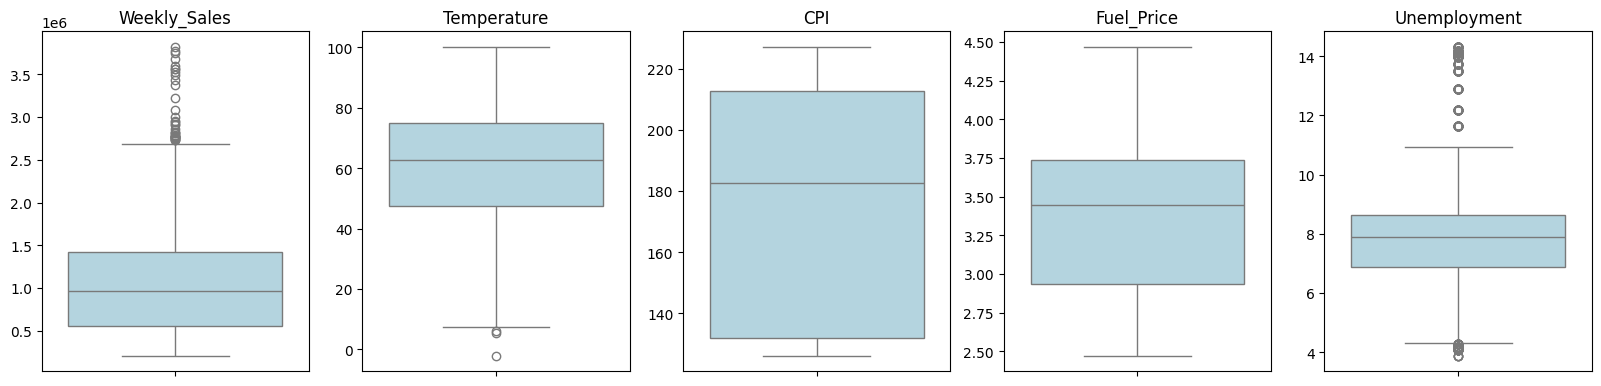

In [327]:
columns=['Weekly_Sales','Temperature','CPI','Fuel_Price','Unemployment']
plt.figure(figsize=(20,15))
for i,colum  in enumerate(columns,1):
    plt.subplot(3,5,i)
    sns.boxplot(data=preprocessed_store_sales_train_features, y=colum,color='lightblue')
    plt.xlabel('')
    plt.ylabel('') 
    plt.title(colum)

<Axes: xlabel='Store', ylabel='count'>

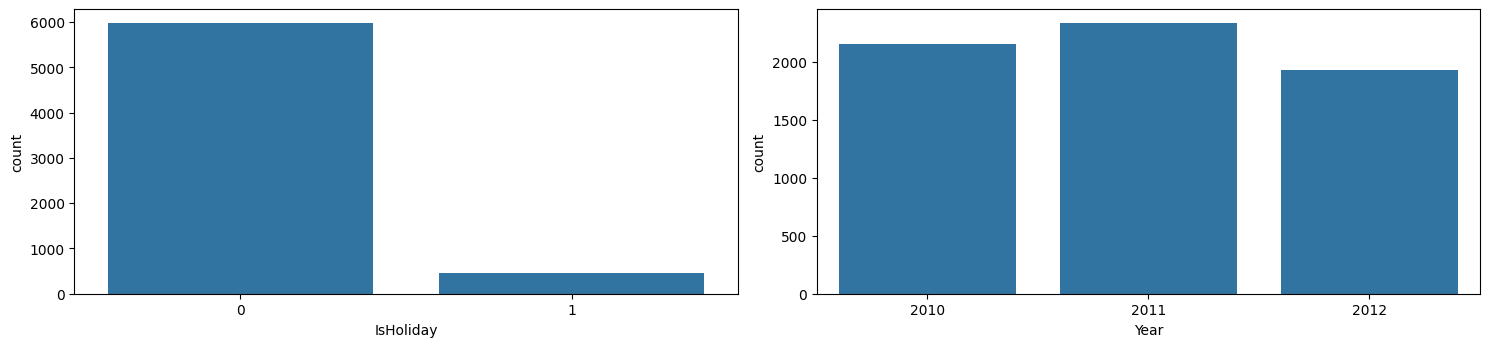

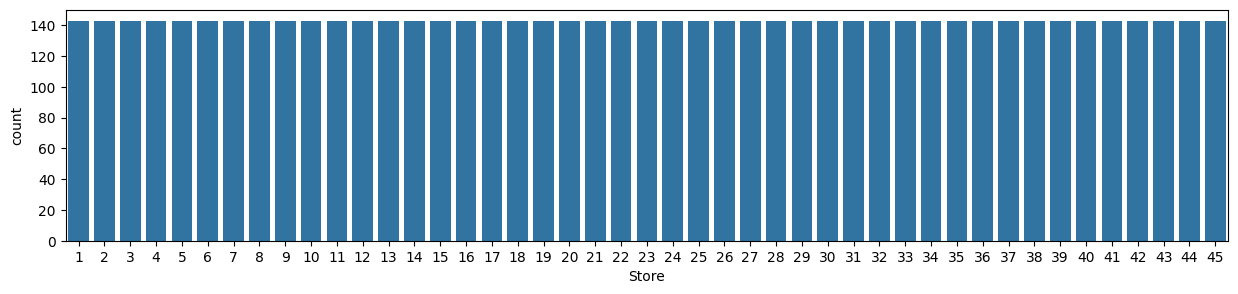

In [240]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.countplot(x=preprocessed_store_sales_train_features['IsHoliday'],data=preprocessed_store_sales_train_features)
plt.subplot(3,2,2)
sns.countplot(x=preprocessed_store_sales_train_features['Year'],data=preprocessed_store_sales_train_features)
plt.tight_layout()
plt.figure(figsize=(15,3))
sns.countplot(x=preprocessed_store_sales_train_features['Store'],data=preprocessed_store_sales_train_features)

Text(0, 0.5, 'Total Weekly Sales')

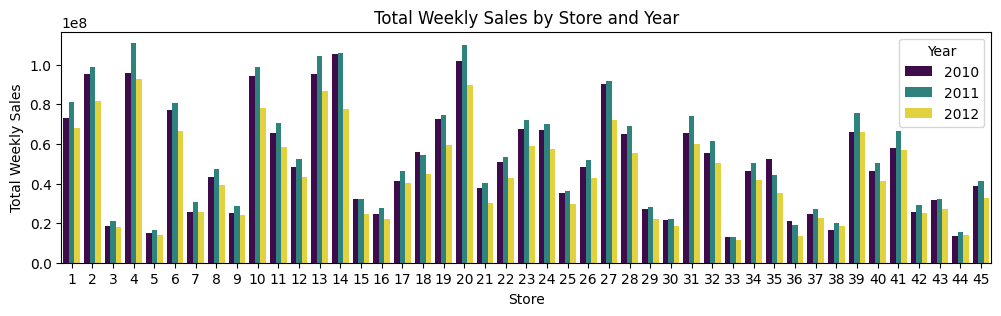

In [241]:
store_year_sales = preprocessed_store_sales_train_features.groupby(['Store', 'Year'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12, 3))
sns.barplot(x='Store', y='Weekly_Sales', hue='Year', data=store_year_sales, palette='viridis')
plt.title('Total Weekly Sales by Store and Year')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')

Text(0, 0.5, 'Total Sales')

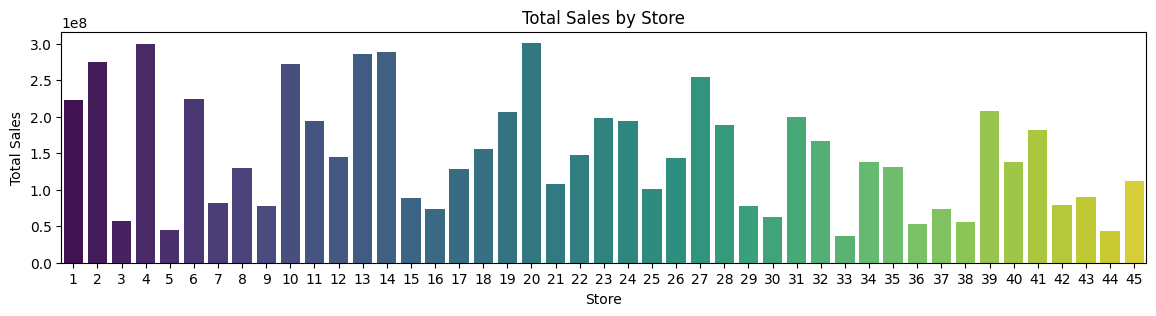

In [242]:
store_sales = preprocessed_store_sales_train_features.groupby('Store')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(14, 3))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, palette='viridis')
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')

Text(0.5, 1.0, 'Pairplots for all the Feature')

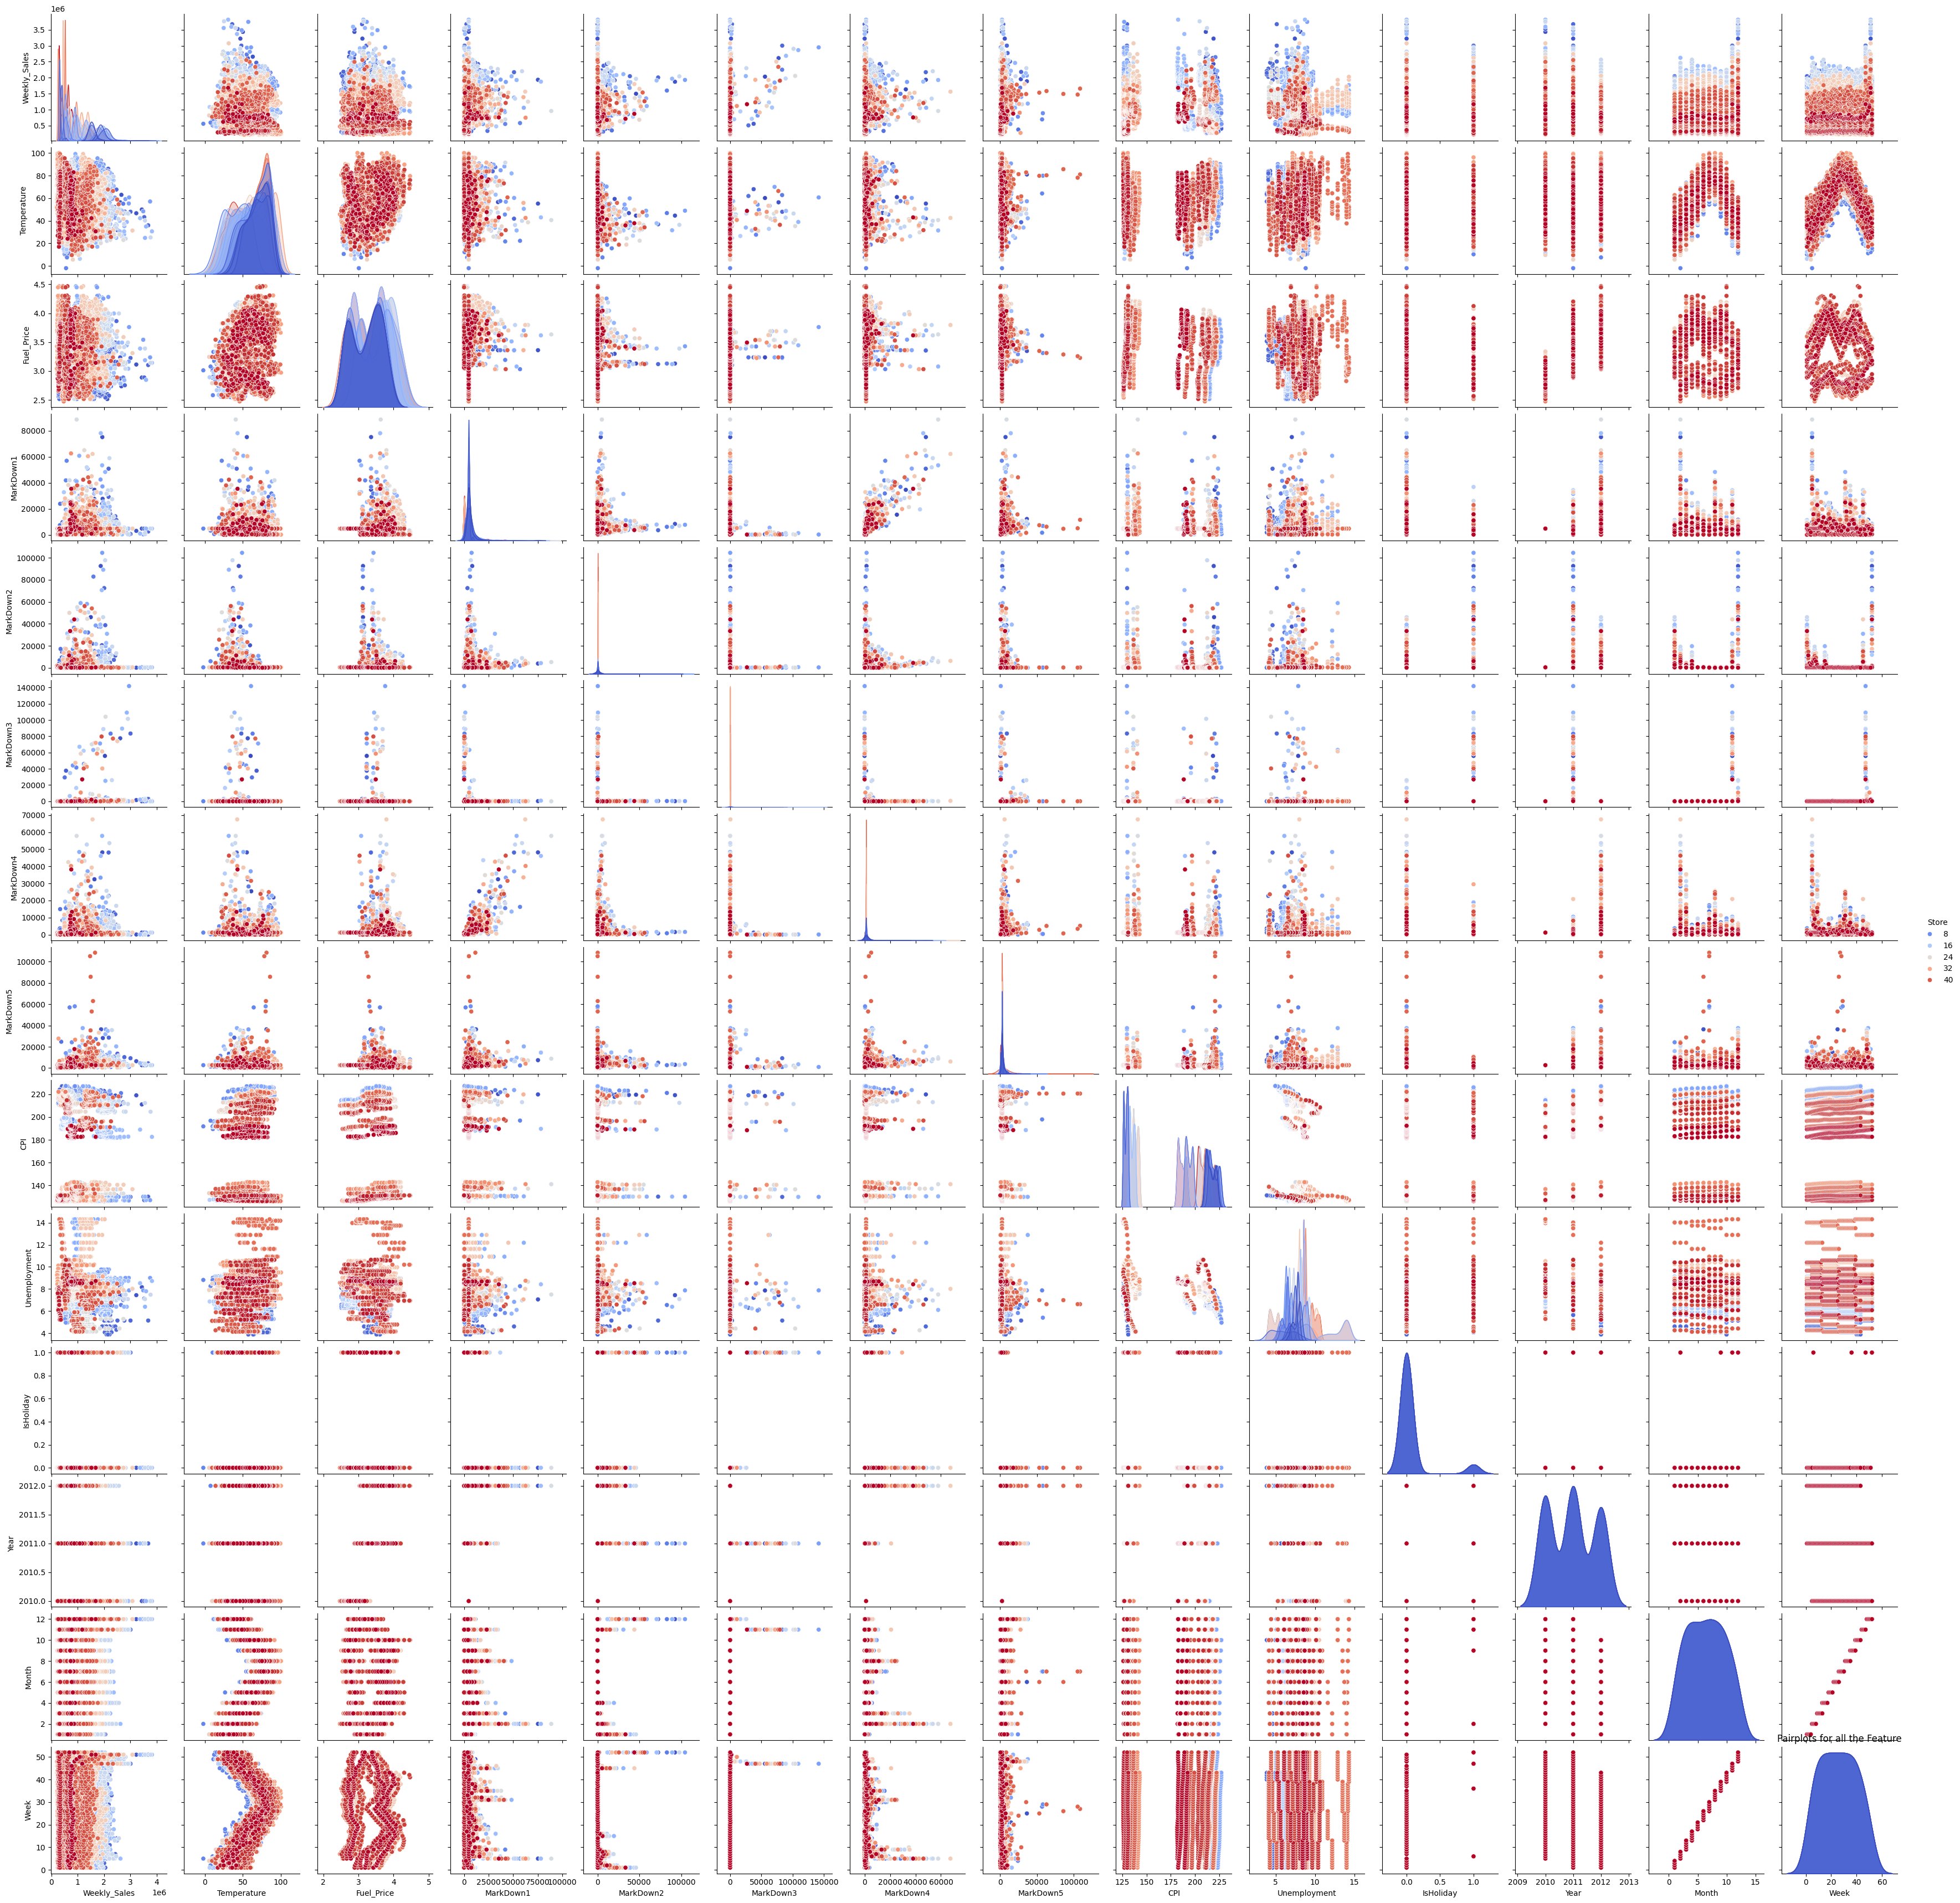

In [243]:
sns.pairplot(preprocessed_store_sales_train_features, hue='Store',palette='coolwarm')
plt.title('Pairplots for all the Feature')

In [244]:
preprocessed_store_sales_train_features.head()

Store       Date  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
0      1 2010-02-05    1643690.90        42.31       2.572    4743.58   
1      1 2010-02-12    1641957.44        38.51       2.548    4743.58   
2      1 2010-02-19    1611968.17        39.93       2.514    4743.58   
3      1 2010-02-26    1409727.59        46.63       2.561    4743.58   
4      1 2010-03-05    1554806.68        46.50       2.625    4743.58   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0     364.57      36.26   1176.425   2727.135  211.096358         8.106   
1     364.57      36.26   1176.425   2727.135  211.242170         8.106   
2     364.57      36.26   1176.425   2727.135  211.289143         8.106   
3     364.57      36.26   1176.425   2727.135  211.319643         8.106   
4     364.57      36.26   1176.425   2727.135  211.350143         8.106   

   IsHoliday  Year  Month  Week  
0          0  2010      2     5  
1          1  2010      2     6  
2          0  2010      2     7  
3          0  2010      2     8  
4          0  2010      3     9

In [245]:
def_features = ['Store', 'Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Month', 'Week']
X_train = preprocessed_store_sales_train_features[def_features]
y_train = preprocessed_store_sales_train_features['Weekly_Sales']

X_test = preprocessed_store_sales_test_features[def_features]
# y_test does not exist in the testing data set

In [246]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [247]:
y_pred = lin_reg.predict(X_test)

In [248]:
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv(r"C:\Users\patel\OneDrive\Desktop\projects\SIF Application\SIF\data\y_pred.csv")

In [249]:
#now that we have this predicted weekly sales data, the issue we have is that there is no 
#real way to check how accurate this data is since we don't have original values for weekly sales.

#to correct this I will go back and split the training data 80-20 to train and then test respectively

In [302]:
X = preprocessed_store_sales_train_features.drop(['Weekly_Sales', 'Date'], axis=1)
y = preprocessed_store_sales_train_features['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [303]:
X_train.shape, X_test.shape

((5148, 14), (1287, 14))

In [304]:
numerical_features = ['Store', 'Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Month', 'Week']

In [335]:
# Standardization
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numerical_features)]).set_output(transform='pandas')

X_train_prep = preprocessor.fit_transform(X_train)

In [306]:
X_train_prep

num__Store  num__Temperature  num__Fuel_Price  num__MarkDown1  \
1033   -1.164666          0.805778        -1.710883       -0.151093   
915    -1.241656         -2.151085         0.018567       -0.151093   
5903    1.453006          0.043555        -0.511214       -0.151093   
2083   -0.625733          0.473930         1.187587       -0.151093   
5943    1.453006          1.459731         0.830751       -0.151093   
...          ...               ...              ...             ...   
3772    0.298151         -1.143088         0.123647       -0.151093   
5191    1.068054         -0.324564        -1.435047       -0.151093   
5226    1.068054          1.422378         0.701590       -0.151093   
5390    1.145044         -0.855089         0.141161       -1.087308   
860    -1.241656         -1.794875        -1.780937       -0.151093   

      num__MarkDown2  num__MarkDown3  num__MarkDown4  num__MarkDown5  \
1033       -0.149050       -0.078317       -0.186806       -0.163930   
915        -0.149050       -0.078317       -0.186806       -0.163930   
5903       -0.149050       -0.078317       -0.186806       -0.163930   
2083       -0.149050       -0.078317       -0.186806       -0.163930   
5943       -0.149050       -0.078317       -0.186806       -0.163930   
...              ...             ...             ...             ...   
3772       -0.149050       -0.078317       -0.186806       -0.163930   
5191       -0.149050       -0.078317       -0.186806       -0.163930   
5226       -0.149050       -0.078317       -0.186806       -0.163930   
5390        0.161221       -0.078317       -0.536374       -0.687398   
860        -0.149050       -0.078317       -0.186806       -0.163930   

      num__CPI  num__Unemployment  num__IsHoliday  num__Year  num__Month  \
1033  1.103804          -0.897874       -0.268427  -1.225760    0.795570   
915   0.522548           0.438475       -0.268427   0.032508   -1.056243   
5903 -1.146134           0.537246       -0.268427  -1.225760    1.412841   
2083 -0.899892          -0.101831       -0.268427   0.032508    0.486934   
5943 -1.077504           0.138957       -0.268427   0.032508    0.486934   
...        ...                ...             ...        ...         ...   
3772 -0.873464          -0.090619       -0.268427   0.032508   -1.364879   
5191  0.989125           0.255881       -0.268427  -1.225760    1.721476   
5226  1.088999           0.096246       -0.268427   0.032508    0.486934   
5390 -1.056351           2.612512        3.725401   0.032508    1.721476   
860   0.458249           0.543119       -0.268427  -1.225760   -1.364879   

      num__Week  
1033   0.797897  
915   -1.111978  
5903   1.363786  
2083   0.585689  
5943   0.514953  
...         ...  
3772  -1.324186  
5191   1.575995  
5226   0.373481  
5390   1.858939  
860   -1.324186  

[5148 rows x 14 columns]

In [307]:
lr = LinearRegression()

scores = cross_val_score(lr, X_train_prep, y_train, cv=5)

print('Cross Validation Scores: ', scores)
print('Mean: ', scores.mean())
print('Standard Deviation: ', scores.std())

Cross Validation Scores:  [0.2079316  0.20821634 0.18060898 0.20124722 0.2540661 ]
Mean:  0.2104140477229607
Standard Deviation:  0.02403691480007562


In [308]:
ridge = Ridge()  # alpha
lasso = Lasso()  # alpha
svr = SVR()      # kernel, C, epsilon, gamma, coef0, degree
knn = KNeighborsRegressor()  # n_neighbors
tree = DecisionTreeRegressor()  # max_depth, min_samples_split, min_samples_leaf
forest = RandomForestRegressor()  # n_estimators, max_depth, min_samples_split, min_samples_leaf

models = [ridge, lasso, svr, knn, tree, forest]

models_scores = {}
for model in models:
    scores = cross_val_score(model, X_train_prep, y_train, cv=5)
    models_scores[model.__class__.__name__] = scores.mean()

In [310]:
models_scores

{'Ridge': np.float64(0.21042877108512567),
 'Lasso': np.float64(0.2104152686115302),
 'SVR': np.float64(-0.023585175631756484),
 'KNeighborsRegressor': np.float64(0.5490724691480147),
 'DecisionTreeRegressor': np.float64(0.927611101357441),
 'RandomForestRegressor': np.float64(0.9564930755609625)}

In [311]:
rf = RandomForestRegressor()
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [15, 30, 50],
}

grid = GridSearchCV(rf, params, cv=3)
grid.fit(X_train_prep, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 30, 'n_estimators': 300}
0.9535547094745747


In [312]:
X_test_prep = preprocessor.transform(X_test)

In [313]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_prep)
acc = best_model.score(X_test_prep, y_test)
print('Test Accuracy: ', acc)

Test Accuracy:  0.9569057995395313


In [ ]:
#redo while removing outliers to improve accuracy

In [290]:
# outlier remove
def remove_outliers(preprocessed_store_sales_train_features, columns):
    for column in columns:
        Q1 = preprocessed_store_sales_train_features[column].quantile(0.25)
        Q3 = preprocessed_store_sales_train_features[column].quantile(0.75)
        IQR = Q3 - Q1
        # Define outliers as any value below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
        preprocessed_store_sales_train_features = preprocessed_store_sales_train_features[(preprocessed_store_sales_train_features[column] >= Q1 - 1.5 * IQR) & (preprocessed_store_sales_train_features[column] <= Q3 + 1.5 * IQR)]
    return preprocessed_store_sales_train_features

columns = ['Weekly_Sales', 'Temperature','Unemployment']

# Remove outliers
preprocessed_store_sales_train_features_clean = remove_outliers(preprocessed_store_sales_train_features, columns)
preprocessed_store_sales_train_features_clean

Store       Date  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
0         1 2010-02-05    1643690.90        42.31       2.572    4743.58   
1         1 2010-02-12    1641957.44        38.51       2.548    4743.58   
2         1 2010-02-19    1611968.17        39.93       2.514    4743.58   
3         1 2010-02-26    1409727.59        46.63       2.561    4743.58   
4         1 2010-03-05    1554806.68        46.50       2.625    4743.58   
...     ...        ...           ...          ...         ...        ...   
6430     45 2012-09-28     713173.95        64.88       3.997    4556.61   
6431     45 2012-10-05     733455.07        64.89       3.985    5046.74   
6432     45 2012-10-12     734464.36        54.47       4.000    1956.28   
6433     45 2012-10-19     718125.53        56.47       3.969    2004.02   
6434     45 2012-10-26     760281.43        58.85       3.882    4018.91   

      MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0        364.57      36.26   1176.425   2727.135  211.096358         8.106   
1        364.57      36.26   1176.425   2727.135  211.242170         8.106   
2        364.57      36.26   1176.425   2727.135  211.289143         8.106   
3        364.57      36.26   1176.425   2727.135  211.319643         8.106   
4        364.57      36.26   1176.425   2727.135  211.350143         8.106   
...         ...        ...        ...        ...         ...           ...   
6430      20.64       1.50   1601.010   3288.250  192.013558         8.684   
6431     364.57      18.82   2253.430   2340.010  192.170412         8.667   
6432     364.57       7.89    599.320   3990.540  192.327265         8.667   
6433     364.57       3.18    437.730   1537.490  192.330854         8.667   
6434      58.08     100.00    211.940    858.330  192.308899         8.667   

      IsHoliday  Year  Month  Week  
0             0  2010      2     5  
1             1  2010      2     6  
2             0  2010      2     7  
3             0  2010      2     8  
4             0  2010      3     9  
...         ...   ...    ...   ...  
6430          0  2012      9    39  
6431          0  2012     10    40  
6432          0  2012     10    41  
6433          0  2012     10    42  
6434          0  2012     10    43  

[5917 rows x 16 columns]

In [291]:
X = preprocessed_store_sales_train_features_clean.drop(['Weekly_Sales', 'Date'], axis=1)
y = preprocessed_store_sales_train_features_clean['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [292]:
X_train.shape, X_test.shape

((4733, 14), (1184, 14))

In [318]:
numerical_features = ['Store', 'Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Month', 'Week']

In [319]:
# Standardization
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numerical_features)]).set_output(transform='pandas')

X_train_prep = preprocessor.fit_transform(X_train)

In [316]:
X_train_prep

num__Store  num__Temperature  num__Fuel_Price  num__MarkDown1  \
1033   -1.164666          0.805778        -1.710883       -0.151093   
915    -1.241656         -2.151085         0.018567       -0.151093   
5903    1.453006          0.043555        -0.511214       -0.151093   
2083   -0.625733          0.473930         1.187587       -0.151093   
5943    1.453006          1.459731         0.830751       -0.151093   
...          ...               ...              ...             ...   
3772    0.298151         -1.143088         0.123647       -0.151093   
5191    1.068054         -0.324564        -1.435047       -0.151093   
5226    1.068054          1.422378         0.701590       -0.151093   
5390    1.145044         -0.855089         0.141161       -1.087308   
860    -1.241656         -1.794875        -1.780937       -0.151093   

      num__MarkDown2  num__MarkDown3  num__MarkDown4  num__MarkDown5  \
1033       -0.149050       -0.078317       -0.186806       -0.163930   
915        -0.149050       -0.078317       -0.186806       -0.163930   
5903       -0.149050       -0.078317       -0.186806       -0.163930   
2083       -0.149050       -0.078317       -0.186806       -0.163930   
5943       -0.149050       -0.078317       -0.186806       -0.163930   
...              ...             ...             ...             ...   
3772       -0.149050       -0.078317       -0.186806       -0.163930   
5191       -0.149050       -0.078317       -0.186806       -0.163930   
5226       -0.149050       -0.078317       -0.186806       -0.163930   
5390        0.161221       -0.078317       -0.536374       -0.687398   
860        -0.149050       -0.078317       -0.186806       -0.163930   

      num__CPI  num__Unemployment  num__IsHoliday  num__Year  num__Month  \
1033  1.103804          -0.897874       -0.268427  -1.225760    0.795570   
915   0.522548           0.438475       -0.268427   0.032508   -1.056243   
5903 -1.146134           0.537246       -0.268427  -1.225760    1.412841   
2083 -0.899892          -0.101831       -0.268427   0.032508    0.486934   
5943 -1.077504           0.138957       -0.268427   0.032508    0.486934   
...        ...                ...             ...        ...         ...   
3772 -0.873464          -0.090619       -0.268427   0.032508   -1.364879   
5191  0.989125           0.255881       -0.268427  -1.225760    1.721476   
5226  1.088999           0.096246       -0.268427   0.032508    0.486934   
5390 -1.056351           2.612512        3.725401   0.032508    1.721476   
860   0.458249           0.543119       -0.268427  -1.225760   -1.364879   

      num__Week  
1033   0.797897  
915   -1.111978  
5903   1.363786  
2083   0.585689  
5943   0.514953  
...         ...  
3772  -1.324186  
5191   1.575995  
5226   0.373481  
5390   1.858939  
860   -1.324186  

[5148 rows x 14 columns]

In [296]:
lr = LinearRegression()

scores = cross_val_score(lr, X_train_prep, y_train, cv=5)

print('Cross Validation Scores: ', scores)
print('Mean: ', scores.mean())
print('Standard Deviation: ', scores.std())

Cross Validation Scores:  [0.18515365 0.18989161 0.22823357 0.1914137  0.19212844]
Mean:  0.19736419373515607
Standard Deviation:  0.015624832636112076


In [297]:
#other regressions

ridge = Ridge()  # alpha
lasso = Lasso()  # alpha
svr = SVR()      # kernel, C, epsilon, gamma, coef0, degree
knn = KNeighborsRegressor()  # n_neighbors
tree = DecisionTreeRegressor()  # max_depth, min_samples_split, min_samples_leaf
forest = RandomForestRegressor()  # n_estimators, max_depth, min_samples_split, min_samples_leaf

models = [ridge, lasso, svr, knn, tree, forest]

models_scores = {}
for model in models:
    scores = cross_val_score(model, X_train_prep, y_train, cv=5)
    models_scores[model.__class__.__name__] = scores.mean()

In [329]:
models_scores

{'Ridge': np.float64(0.21042877108512567),
 'Lasso': np.float64(0.2104152686115302),
 'SVR': np.float64(-0.023585175631756484),
 'KNeighborsRegressor': np.float64(0.5490724691480147),
 'DecisionTreeRegressor': np.float64(0.927611101357441),
 'RandomForestRegressor': np.float64(0.9564930755609625)}

In [299]:
rf = RandomForestRegressor()
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [15, 30, 50],
}

grid = GridSearchCV(rf, params, cv=3)
grid.fit(X_train_prep, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 30, 'n_estimators': 200}
0.9570385350276713


In [300]:
X_test_prep = preprocessor.transform(X_test)

In [301]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_prep)
acc = best_model.score(X_test_prep, y_test)
print('Test Accuracy: ', acc)

Test Accuracy:  0.9628579751068601


In [ ]:
#though this is linear test and economics are not linear this is a pretty accurate model at trying to predict weekly_sales of a store within the data set